In [8]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split # For splitting data
from sklearn.metrics import accuracy_score, mean_squared_error # For evaluating performance
import matplotlib.pyplot as plt # For plotting the tree
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv(r'D:\workspace\MachineLearning\Datasets\Datasets\Boston.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
X,y = df.drop('medv', axis=1), df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [6]:
dtr = DecisionTreeRegressor(random_state=25)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

In [9]:
print(r2_score(y_test, y_pred))

0.6931722481543132


In [10]:
depths = [2,3,4,None]
min_samples = [2,5,10,20,50]
min_sample_leaf = [1,5,10,20,50]
scores=[]

for d in depths:
    for leaf in min_sample_leaf:
        for split in min_samples:
            dtc = DecisionTreeRegressor(random_state=25, max_depth=d, min_samples_leaf=leaf, min_samples_split= split)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            scores.append([d,leaf,split,r2_score(y_test, y_pred)])

scores_df = pd.DataFrame(scores, columns=['Depth','Leaf','Split', 'Scores'])
scores_df.sort_values('Scores', ascending=False).iloc[0]

Depth     4.000000
Leaf      1.000000
Split     2.000000
Scores    0.772509
Name: 50, dtype: float64

In [12]:
best_model = DecisionTreeRegressor(random_state=25, max_depth=4, min_samples_leaf=1, min_samples_split= 2)
best_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=25)

In [13]:
best_model.feature_importances_

array([0.03214506, 0.        , 0.        , 0.        , 0.03161613,
       0.65509158, 0.        , 0.05346705, 0.        , 0.02072176,
       0.00214448, 0.        , 0.20481394])

In [14]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [16]:
df_imp = pd.DataFrame({
    'Feature':list(X.columns),
    'Importance' : best_model.feature_importances_
})

df_imp.sort_values('Importance', ascending=False)

,Feature,Importance
5,rm,0.655092
12,lstat,0.204814
7,dis,0.053467
0,crim,0.032145
4,nox,0.031616
9,tax,0.020722
10,ptratio,0.002144
1,zn,0.000000
2,indus,0.000000
3,chas,0.000000


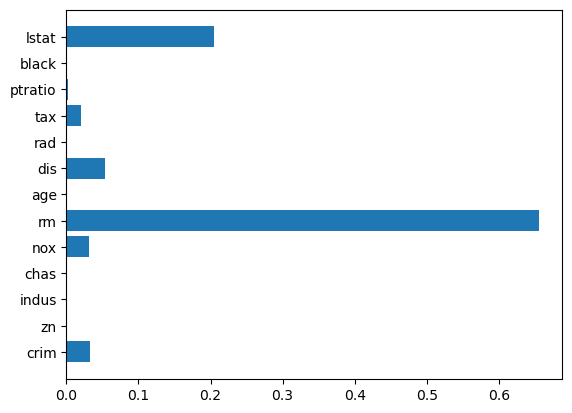

In [17]:
plt.barh(df_imp['Feature'], df_imp['Importance'])
plt.show()

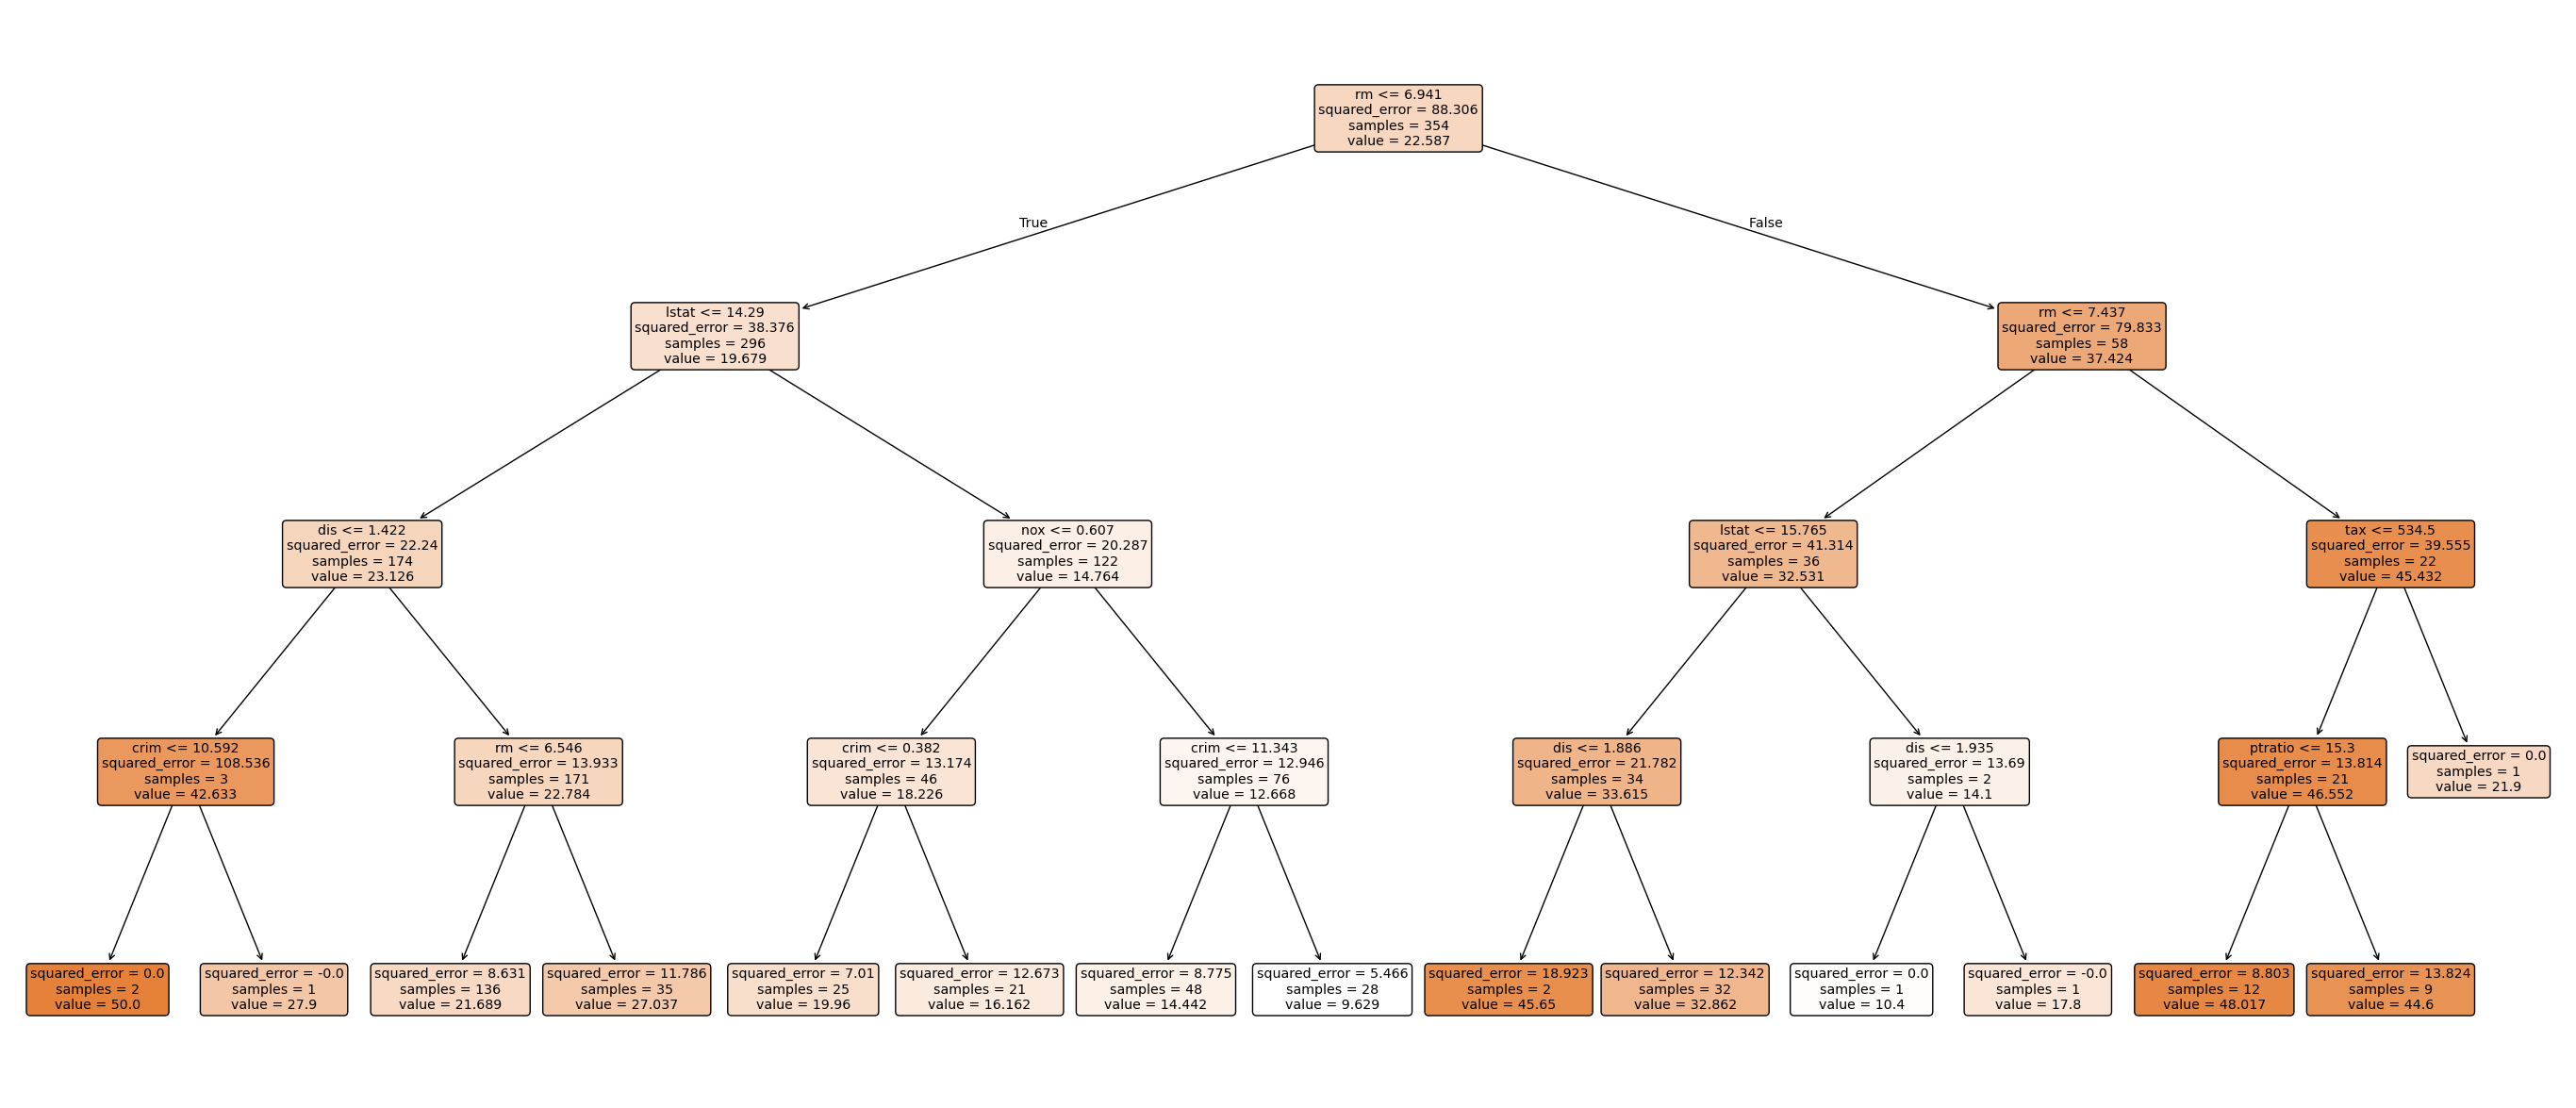

In [18]:
plt.figure(figsize=(35, 15))
plot_tree(best_model, feature_names=list(X.columns),  filled=True, rounded=True)
plt.show()